In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iplprojectcsv/ipl.csv - ipl.csv.csv


In [26]:
import pandas as pd

my_data = pd.read_csv('../input/iplprojectcsv/ipl.csv - ipl.csv.csv')
print(my_data)


      POS            PLAYER   Mat  Inns   Runs    HS    Avg   BF      SR  100  \
0     1.0           KLRahul   9.0   9.0  525.0  132*     75  387  135.65  1.0   
1     2.0    Mayank Agarwal   9.0   9.0  393.0   106  43.66  247  159.10  1.0   
2     3.0    Faf du Plessis  10.0  10.0  375.0   87*  46.87  265  141.50  0.0   
3     4.0    Shikhar Dhawan   9.0   9.0  359.0  101*  51.28  251  143.02  1.0   
4     5.0       Virat Kohli   9.0   9.0  347.0   90*  57.83  272  127.57  0.0   
...   ...               ...   ...   ...    ...   ...    ...  ...     ...  ...   
1085  NaN     Mandeep Singh   NaN   NaN    NaN   NaN    NaN  NaN     NaN  NaN   
1086  NaN                13   2.0   NaN    NaN   NaN    NaN  NaN     NaN  NaN   
1087  NaN               100   NaN   NaN    NaN   NaN    NaN  NaN     NaN  NaN   
1088  NaN  Liam Livingstone   NaN   NaN    NaN   NaN    NaN  NaN     NaN  NaN   
1089  NaN                 4   1.0   NaN    NaN   NaN    NaN  NaN     NaN  NaN   

       50    4s   Ov  Wkts 

In [27]:
my_data.isnull()
my_data.isnull().sum()
#my_data.drop("POS")
#percent= 100*(len(my_data.loc[:,my_data.isnull().sum(axis=0)>=1 ].index) / len(my_data.index))
#print(round(percent,2))
#percent_missing = my_data.isnull().sum() * 100 / len(my_data)
#missing_value_df = my_data.DataFrame({'column_name': my_data.columns,
#                                 'percent_missing': percent_missing})






POS       990
PLAYER    202
Mat       502
Inns      602
Runs      702
HS        789
Avg       789
BF        789
SR        789
100       789
50        789
4s        789
Ov        702
Wkts      803
BBI       803
Avg.1     803
Econ      803
SR.1      803
4w        802
5w        802
dtype: int64

In [28]:
#my_data.dropna(subset=['PLAYER', 'Mat'], inplace=True)
#print(my_data)
#my_data['POS'].fillna(0,inplace=True)
#print(my_data)

In [29]:
#my_data['POS'].fillna(0,inplace=True)
#print(my_data)
#value=my_data['POS'].isnull().sum()
#percent=(value/my_data.sum())*100
#print(percent)


In [30]:
#my_data['Inns'].fillna(my_data['Mat'].median(),inplace=True)
#print(my_data)
#my_data.drop('POS',axis='columns',inplace=True)
#print(my_data)

In [31]:

my_data['POS'].fillna(0,inplace=True)
#my_data.drop(my_data["POS"],axis=1,inplace=True)
my_data.pop("POS")
my_data.dropna(subset=['PLAYER', 'Mat'], inplace=True)
#print(my_data)
my_data['Inns']=my_data['Inns'].fillna(my_data["Mat"])
my_data.loc[my_data["SR"].isnull(),"SR"] = my_data["SR"].quantile(0.10)
my_data.loc[my_data["Runs"].isnull(),"Runs"] = my_data["Runs"].quantile(0.10)
my_data=my_data.fillna(0)
my_data.isnull().sum()
display(my_data.loc[my_data.Mat<35])
my_data_ipl=my_data.loc[my_data.Mat<35]
print(my_data)



#for i in M:
#    for j in Q:
        
#    df.loc[df['X'] == 1, 'Y'].sum()

,PLAYER,Mat,Inns,Runs,HS,Avg,BF,SR,100,50,4s,Ov,Wkts,BBI,Avg.1,Econ,SR.1,4w,5w
0,KLRahul,9.0,9.0,525.0,132*,75,387,135.65,1.0,5.0,45.0,0.0,0.0,0,0,0.00,0,0.0,0.0
1,Mayank Agarwal,9.0,9.0,393.0,106,43.66,247,159.10,1.0,2.0,39.0,0.0,0.0,0,0,0.00,0,0.0,0.0
2,Faf du Plessis,10.0,10.0,375.0,87*,46.87,265,141.50,0.0,4.0,36.0,0.0,0.0,0,0,0.00,0,0.0,0.0
3,Shikhar Dhawan,9.0,9.0,359.0,101*,51.28,251,143.02,1.0,2.0,39.0,0.0,0.0,0,0,0.00,0,0.0,0.0
4,Virat Kohli,9.0,9.0,347.0,90*,57.83,272,127.57,0.0,2.0,18.0,0.0,0.0,0,0,0.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1,1.0,1.0,15.6,0,0,0,94.73,0.0,0.0,0.0,4.0,0.0,0/42,-,10.50,-,0.0,0.0
1080,4,3.0,3.0,15.6,0,0,0,94.73,0.0,0.0,0.0,5.0,0.0,0/12,-,11.00,-,0.0,0.0
1083,2,2.0,2.0,15.6,0,0,0,94.73,0.0,0.0,0.0,4.0,0.0,0/24,-,12.75,-,0.0,0.0
1086,13,2.0,2.0,15.6,0,0,0,94.73,0.0,0.0,0.0,2.0,0.0,0/8,-,13.00,-,0.0,0.0


              PLAYER   Mat  Inns   Runs    HS    Avg   BF      SR  100   50  \
0            KLRahul   9.0   9.0  525.0  132*     75  387  135.65  1.0  5.0   
1     Mayank Agarwal   9.0   9.0  393.0   106  43.66  247  159.10  1.0  2.0   
2     Faf du Plessis  10.0  10.0  375.0   87*  46.87  265  141.50  0.0  4.0   
3     Shikhar Dhawan   9.0   9.0  359.0  101*  51.28  251  143.02  1.0  2.0   
4        Virat Kohli   9.0   9.0  347.0   90*  57.83  272  127.57  0.0  2.0   
...              ...   ...   ...    ...   ...    ...  ...     ...  ...  ...   
1077               1   1.0   1.0   15.6     0      0    0   94.73  0.0  0.0   
1080               4   3.0   3.0   15.6     0      0    0   94.73  0.0  0.0   
1083               2   2.0   2.0   15.6     0      0    0   94.73  0.0  0.0   
1086              13   2.0   2.0   15.6     0      0    0   94.73  0.0  0.0   
1089               4   1.0   1.0   15.6     0      0    0   94.73  0.0  0.0   

        4s   Ov  Wkts   BBI Avg.1   Econ SR.1   4w 

In [32]:

my_data.isnull().sum()
display(my_data.columns)
M=my_data.columns
i=0
for i in M:
 my_data.loc[my_data["i"].isnull(),"i"] = my_data["i"].quantile(0.5)
print(my_data)

Index(['PLAYER', 'Mat', 'Inns', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50',
       '4s', 'Ov', 'Wkts', 'BBI', 'Avg.1', 'Econ', 'SR.1', '4w', '5w'],
      dtype='object')

KeyError: 'i'

In [ ]:
display(my_data.loc[my_data.Mat<35])
print(my_data)


In [ ]:
my_data.describe()
my_data.info()



In [ ]:
import matplotlib.pyplot as plt
plt.plot(my_data[Mat], my_data[Runs], label=Runs)
plt.plot(my_data[Mat], my_data[Avg], label=Avg)
plt.plot(my_data[Mat], my_data[SR], label=SR)
plt.xlabel('Matches')
plt.ylabel('Realationship between Runs,Avg,SR')
plt.title('Batsman')
plt.grid(True)
plt.legend()

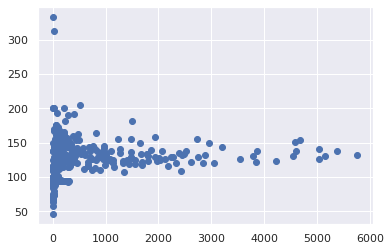

In [42]:
plt.scatter(my_data['Runs'], my_data['SR'])

ValueError: could not convert string to float: '-'

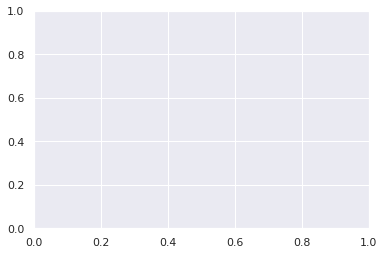

(array([213.,  46.,  25.,  23.,  25.,  20.,  19.,  11.,   8.,   7.,   3.,
          5.,   1.,   2.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.]),
 array([   5.  ,   49.08,   93.16,  137.24,  181.32,  225.4 ,  269.48,
         313.56,  357.64,  401.72,  445.8 ,  489.88,  533.96,  578.04,
         622.12,  666.2 ,  710.28,  754.36,  798.44,  842.52,  886.6 ,
         930.68,  974.76, 1018.84, 1062.92, 1107.  ]),
 <a list of 25 Patch objects>)

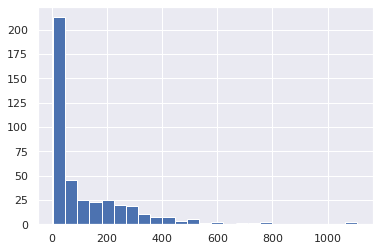

In [35]:
plt.hist(my_data_ipl['Runs'], bins='auto')

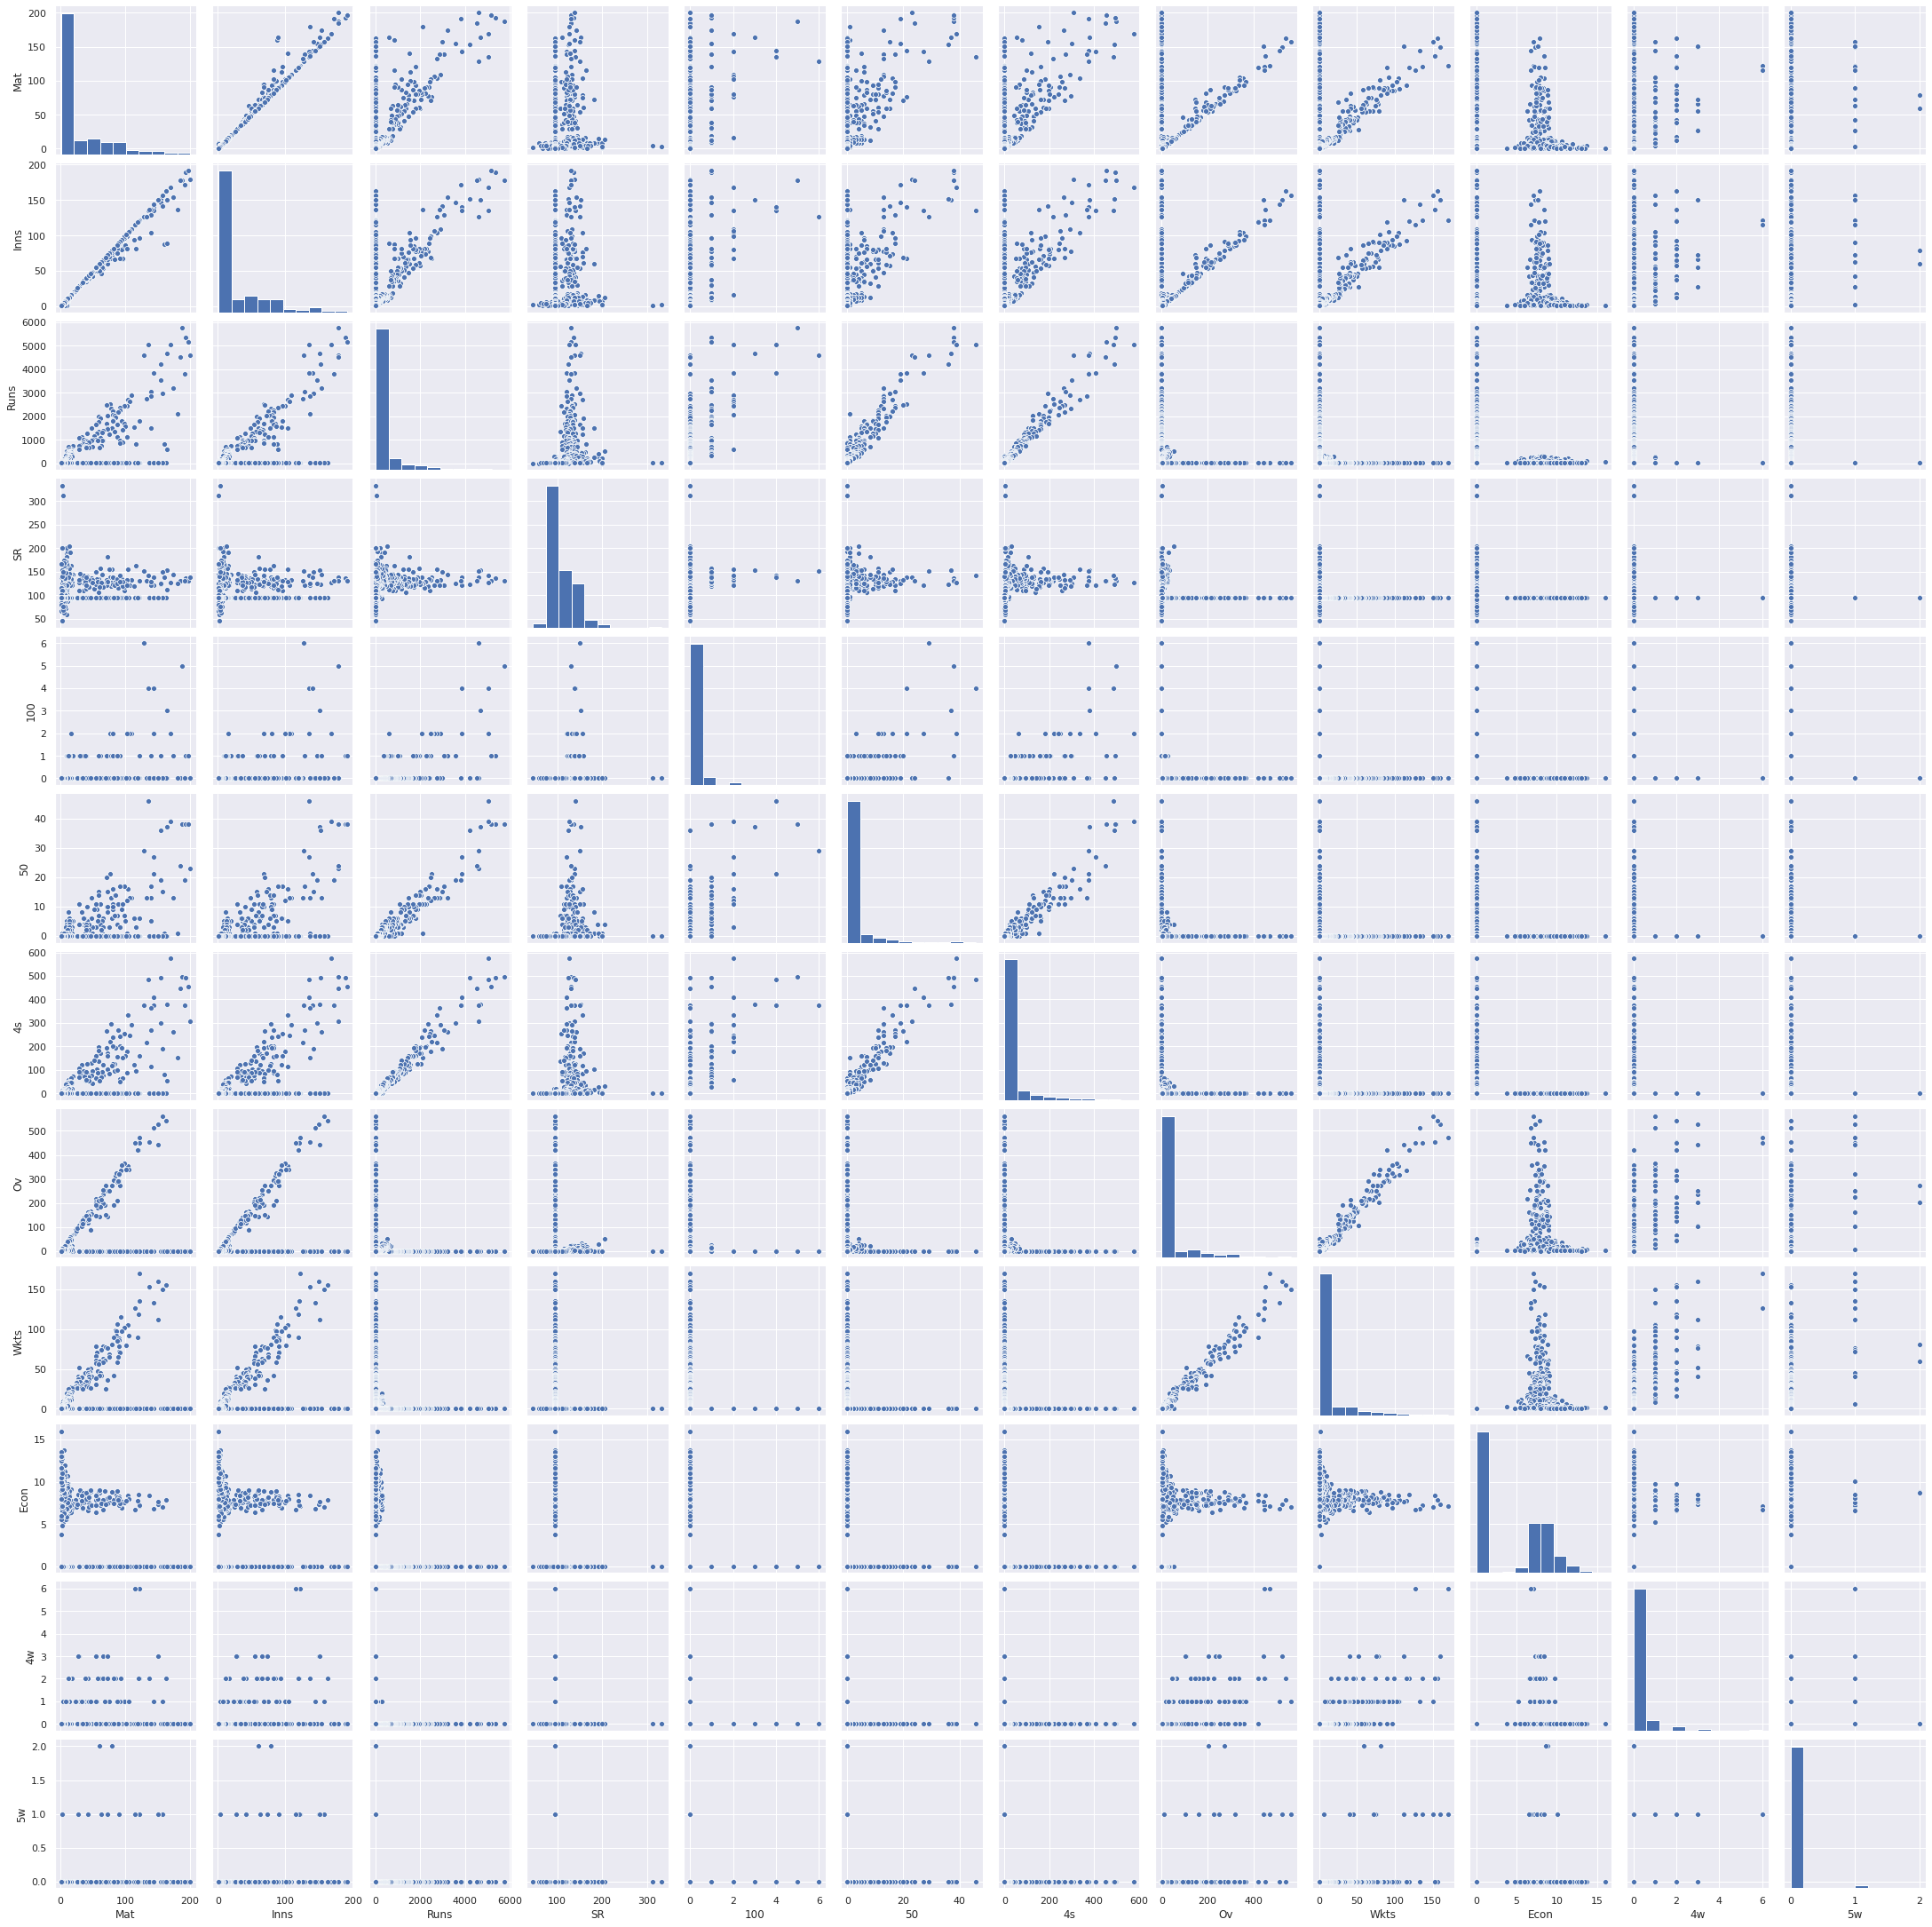

In [33]:
import seaborn as sns
sns.set()
sns.pairplot(my_data)

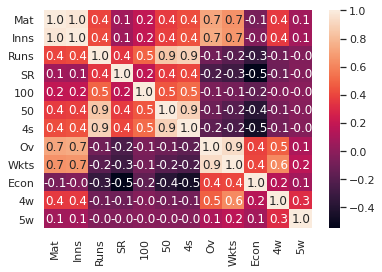

In [34]:
sns.heatmap(my_data_ipl.corr(), annot=True, fmt='.1f')

In [ ]:
#my_data.corr()